In [1]:
import glob
import os

import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:.3f}'.format

#### Ta reda på antalet kolumner och rader i alla områden:

In [3]:
%%time
df_list = []
nr_of_files = 0
for subdir, dirs, files in os.walk("../data/"):
    for file in files:
        if file.endswith(".gzip"):
            nr_of_files += 1
            file_path = os.path.join(subdir, file)
            df = pd.read_parquet(file_path)
            df_list.append(df)
print(nr_of_files)
print(len(df_list))

7320
7320
CPU times: user 1min 37s, sys: 24.8 s, total: 2min 2s
Wall time: 1min


In [ ]:
library(data.table)

df_list <- list()
nr_of_files <- 0

for (file in list.files(path = "../data/areas_of_interest/", recursive = TRUE, full.names = TRUE)) {
  if (endsWith(file, ".gzip")) {
    nr_of_files <- nr_of_files + 1
    df <- fread(file)
    df_list[[nr_of_files]] <- df
  }
}

print(nr_of_files)
print(length(df_list))

In [4]:
shape_list = []
for df in df_list:
    shape_list.append(df.shape[1])

#### Count and plot the distribution

In [5]:
len(shape_list)

7320

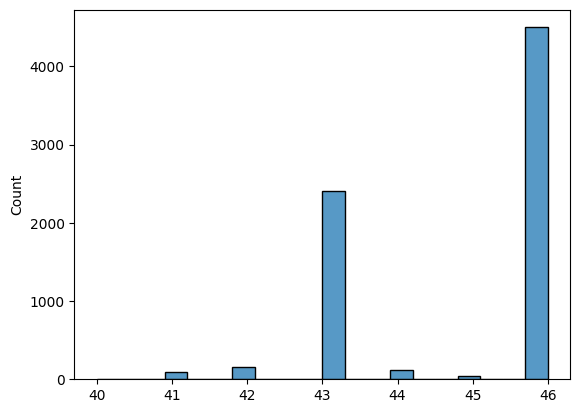

In [6]:
sns.histplot(shape_list);

In [7]:
shape_list.count(39)

0

In [8]:
shape_list.count(40)

2

In [9]:
shape_list.count(41)

93

In [10]:
shape_list.count(42)

155

In [11]:
shape_list.count(43)

2409

In [12]:
shape_list.count(44)

113

In [13]:
shape_list.count(45)

47

In [14]:
shape_list.count(46)

4501

In [15]:
shape_list.count(47)

0

#### One single dataframe for all listings:

In [16]:
%%time
all_df_files_concat = pd.concat(df_list)
all_df_files_concat.shape

CPU times: user 7.71 s, sys: 2.29 s, total: 9.99 s
Wall time: 10.4 s


(1053620, 46)

In [18]:
all_df_files_concat.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897275 entries, 0 to 51
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               897275 non-null  int64  
 1   coordinate                       897275 non-null  object 
 2   address                          897103 non-null  object 
 3   location_name                    897275 non-null  object 
 4   typeSummary                      897275 non-null  object 
 5   iconName                         897275 non-null  object 
 6   project                          897275 non-null  bool   
 7   new_construction                 897275 non-null  bool   
 8   ongoing_bidding                  897275 non-null  bool   
 9   foreclosure                      897275 non-null  bool   
 10  upcoming                         897275 non-null  bool   
 11  price                            896754 non-null  object 
 12  price_

In [21]:
all_df_files_concat.reset_index(drop=True, inplace=True)
all_df_files_concat

,id,coordinate,address,location_name,typeSummary,iconName,project,new_construction,ongoing_bidding,foreclosure,upcoming,price,price_per_area,has_price_change,rooms,fee,age_string,age,deactivated_before_open_house,land_area,small_image_url,medium_image_url,url,labels,state_labels,visible_project_units,show_visible_project_units,user_saved,save_button_label,broker_logo_url,broker_agency_name,locations_string,should_display_showings,should_highlight_showings,living_space.table,trackingData.listingId,trackingData.listingType,trackingData.listingPackageType,trackingData.listingState,trackingData.listingStatus,price_change,broker_name,broker_phone,broker_email,area,date
0,19688535,"[59.37307, 18.0541553]",Torphagsvägen 20,Stockholms kommun,Bostadsrättslägenhet,bostadsratt,False,False,False,False,False,4 200 000 kr,77 778 kr/m²,False,2 rum,3 213 kr/mån,<span>0</span> dagar,0,False,None,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-2rum-ekh...,"[{'category': 'feature', 'hidden': False, 'ide...",[],0.000,False,False,Spara,https://bilder.hemnet.se/images/broker_logo_2/...,Historiska Hem,"Ekhagen, Stockholms kommun",False,False,"{'living_area': '54 m²', 'supplemental_area': ...",19688535,common_listing,not_selected,active,for_sale,NaN,None,None,None,gardet_hjorthagen_norra_djurgarden,20230303
1,19687356,"[59.34551, 18.107872]","Sandhamnsgatan 42A, 3 tr",Stockholms kommun,Bostadsrättslägenhet,bostadsratt,False,False,False,False,False,6 495 000 kr,76 412 kr/m²,False,3 rum,6 144 kr/mån,<span>0</span> dagar,0,False,None,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-3rum-gar...,"[{'category': 'feature', 'hidden': False, 'ide...",[],0.000,False,False,Spara,https://bilder.hemnet.se/images/broker_logo_2/...,Länsförsäkringar Fastighetsförmedling Stockhol...,"Gärdet, Stockholms kommun",False,False,"{'living_area': '85 m²', 'supplemental_area': ...",19687356,common_listing,not_selected,active,for_sale,NaN,None,None,None,gardet_hjorthagen_norra_djurgarden,20230303
2,19687255,"[59.347572283747276, 18.09506183695797]",Rindögatan 13,Stockholms kommun,Bostadsrättslägenhet,bostadsratt,False,False,False,False,False,4 500 000 kr,90 000 kr/m²,False,2 rum,3 353 kr/mån,<span>1</span> dagar,1,False,None,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-2rum-gar...,[],[],0.000,False,False,Spara,https://bilder.hemnet.se/images/broker_logo_2/...,SJÖMAN\FRISK,"Gärdet, Stockholms kommun",False,False,"{'living_area': '50 m²', 'supplemental_area': ...",19687255,common_listing,not_selected,active,for_sale,NaN,None,None,None,gardet_hjorthagen_norra_djurgarden,20230303
3,19680375,"[59.343575, 18.111506]",Östhammarsgatan 67 - Etagebostad - Högst upp,Stockholms kommun,Bostadsrättslägenhet,bostadsratt,False,False,False,False,False,10 495 000 kr,97 176 kr/m²,False,4 rum,6 972 kr/mån,<span>2</span> dagar,2,False,None,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-4rum-ost...,"[{'category': 'feature', 'hidden': False, 'ide...",[],0.000,False,False,Spara,https://bilder.hemnet.se/images/broker_logo_2/...,Fastighetsbyrån Stockholm – Östermalm,"Östermalm / Gärdet, Stockholms kommun",False,False,"{'living_area': '108 m²', 'supplemental_area':...",19680375,common_listing,not_selected,active,for_sale,NaN,None,None,None,gardet_hjorthagen_norra_djurgarden,20230303
4,19196915,"[59.3525467, 18.0932121]",Lanforsvägen 43,Stockholms kommun,Bostadsrättslägenhet,bostadsratt,False,False,False,False,False,2 995 000 kr,67 760 kr/m²,False,2 rum,3 172 kr/mån,<span>3</span> dagar,3,False,None,https://bilder.hemnet.se/images/itemgallery_S/...,https://bilder.hemnet.se/images/itemgallery_M/...,https://www.hemnet.se/bostad/lagenhet-2rum-hjo...,[

* unique ids
* listings without address
* foreclosure
* listings without price
* price_per_area 
* rooms
* fee
* land_area
* price_change
* living_space.table

#### id

In [25]:
all_df_files_concat["id"].nunique()

21566

In [54]:
all_df_files_concat[
    [
        "id",
        "address",
        "date",
        "area"
    ]
].sort_values(
    [
        "id",
        "date"
    ]
)

,id,address,date,area
312,4586297,Brf Roskarlen,20230112,norrtalje
317,4586297,Brf Roskarlen,20230113,norrtalje
325,4586297,Brf Roskarlen,20230114,norrtalje
324,4586297,Brf Roskarlen,20230115,norrtalje
322,4586297,Brf Roskarlen,20230116,norrtalje
...,...,...,...,...
0,19816377,Gästrikegatan 11,20230404,vasastan
0,19816377,Gästrikegatan 11,20230404,stockholm
2,19816416,Breda vägen 80,20230404,danderyd
0,19816576,Torpstugegränd 34,20230404,spanga_tensta


Each row should have a unique combination of id, adress and date.

In [57]:
all_df_files_concat.groupby(["id", "address"]).count()

,,coordinate,location_name,typeSummary,iconName,project,new_construction,ongoing_bidding,foreclosure,upcoming,price,price_per_area,has_price_change,rooms,fee,age_string,age,deactivated_before_open_house,land_area,small_image_url,medium_image_url,url,labels,state_labels,visible_project_units,show_visible_project_units,user_saved,save_button_label,broker_logo_url,broker_agency_name,locations_string,should_display_showings,should_highlight_showings,living_space.table,trackingData.listingId,trackingData.listingType,trackingData.listingPackageType,trackingData.listingState,trackingData.listingStatus,price_change,broker_name,broker_phone,broker_email,area,date
id,address,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4586297,Brf Roskarlen,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,0,83,0,83,83,83,83,83,83,83,0,83,83,83,83,83,83,83,83,83,83,0,0,0,0,83,83
7268215,Kummelnäsvägen 39A - 43A,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,0,40,40,40,40,40,40,40,40,40,0,40,40,40,40,40,40,40,40,40,40,0,0,0,0,40,40
8170075,Äppelblomsvägen 75,19,19,19,19,19,19,19,19,19,19,0,19,19,0,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,0,0,0,0,19,19
8307795,Porslinskvarteren 4,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,0,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,0,0,0,0,25,25
9478284,Bromskärsvägen 55,129,129,129,129,129,129,129,129,129,129,0,129,0,0,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,0,0,0,0,129,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19816297,Vickergatan 9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,3,3
19816356,"Hagagatan 15E, 4tr",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,3,3
19816377,Gästrikegatan 11,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,3,3


id duplicates

same id, group by age, count date

#### id == trackingData.listingId?

In [ ]:
all_df_files_concat["id"].equals(all_df_files_concat["trackingData.listingId"])

In [ ]:
all_df_files_concat.query("id == 17009378")

#### image_url

In [ ]:
all_df_files_concat.iloc[0, 20]

In [ ]:
all_df_files_concat.iloc[0, 21]

In [ ]:
all_df_files_concat.sort_values(by=["id", "date"], ascending=[True, True], inplace=True)
all_df_files_concat.reset_index(inplace=True)
all_df_files_concat.drop(columns="index", inplace=True)
all_df_files_concat

In [ ]:
all_df_files_concat.drop_duplicates(subset="id", keep="first", ignore_index=True, inplace=True)
all_df_files_concat.shape

In [ ]:
all_df_files_concat["date"].value_counts().reset_index().sort_values("index")

In [ ]:
pd.to_datetime()

#### Land area in other areas than area of interest:

### Conclusions:

* Unique identifying each listing with id and address